**Table of contents**<a id='toc0_'></a>    
- 1. [Question 1: NVDA](#toc1_)    
  - 1.1. [ When is the first date that NVDA closes at more than 135 dollars? (pick the closest date in Camino)](#toc1_1_)    
  - 1.2. [After the NVDA closing stock price hits 135 dollars, how many trading days did it take for NVDA reach the historical high? (pick the closest number of days in Camino)](#toc1_2_)    
  - 1.3. [Report the correlation matrix between NVDA, TSM, and AMD's closing prices. Which pair of stocks are most correlated with each other?](#toc1_3_)    
  - 1.4. [Suppose I apply the following transformation to adjust the original wide dataset. What structure of the dataset is now? What does each row of data represent?](#toc1_4_)    
- 2. [Question 2: TSM](#toc2_)    
  - 2.1. [Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % gain. (pick the date closest to the day with the largest gain ratio in Camino)](#toc2_1_)    
- 3. [Question 3: AMD](#toc3_)    
  - 3.1. [ Consider the following investment strategy for AMD: buy at the end of day 1, sell on the end of day 3.  Based on this strategy, what is the highest dollar amount you would lose in one trade?  Also report the buying and selling date for that particular trade. (pick the closest dollar amount it dropped in Camino)](#toc3_1_)    
- 4. [Question 4: Stock Movements in NVDA](#toc4_)    
  - 4.1. [In which days did we observe that the price increased more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 preceding trading session (today compared with previous 9 trading days).](#toc4_1_)    
- 5. [Question 5: NVDA](#toc5_)    
  - 5.1. [What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data.](#toc5_1_)    
  - 5.2. [Use cummax()](#toc5_2_)    
  - 5.3. [Use cummin()](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Homework 3

In [127]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

# Data Loading

Note that this dataset was extracted using ```yfinance``` and contains information about 3 stocks in a wide format (one row = 1 trading day, stock information on the columns).

In [128]:
!pip install yfinance

In [129]:
import sys
!{sys.executable} -m pip install yfinance

In [130]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("hw3_stock_data.csv", index_col = "Date", parse_dates= True)

In [131]:
#Set to 2 decimal places, and display all columns (and up to 300 rows)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 300)

In [132]:
data.describe()

,Adj Close_AMD,Adj Close_NVDA,Adj Close_TSM,Close_AMD,Close_NVDA,Close_TSM,High_AMD,High_NVDA,High_TSM,Low_AMD,Low_NVDA,Low_TSM,Open_AMD,Open_NVDA,Open_TSM,Volume_AMD,Volume_NVDA,Volume_TSM
count,11239.00,6474.00,6797.00,11239.00,6474.00,6797.00,11239.00,6474.00,6797.00,11239.00,6474.00,6797.00,11239.00,6474.00,6797.00,11239.00,6474.00,6797.00
mean,20.73,7.10,26.98,20.73,7.13,31.45,21.17,7.26,31.83,20.29,6.98,31.08,20.45,7.12,31.47,19591836.72,603807949.61,9808582.46
std,31.38,19.00,37.05,31.38,18.99,36.93,32.01,19.36,37.41,30.73,18.59,36.46,31.57,18.99,36.97,28787575.77,431367233.11,6284387.00
min,1.62,0.03,1.56,1.62,0.03,3.08,1.69,0.04,3.16,1.61,0.03,2.84,0.00,0.03,3.03,0.00,19680000.00,160282.00
25%,5.44,0.26,5.05,5.44,0.28,9.48,5.58,0.29,9.62,5.31,0.27,9.34,5.12,0.28,9.49,1301700.00,343431000.00,5737000.00
50%,10.19,0.43,8.90,10.19,0.46,13.70,10.38,0.47,13.88,9.96,0.45,13.58,10.19,0.46,13.72,7459400.00,504860500.00,8629100.00
75%,16.94,4.30,32.30,16.94,4.32,37.84,17.25,4.40,38.12,16.62,4.28,37.49,16.94,4.32,37.85,25397150.00,734866500.00,12516270.00
max,211.38,138.07,192.21,211.38,138.07,192.21,227.30,140.76,194.25,208.22,136.30,190.50,213.41,139.80,193.09,325058400.00,9230856000.00,60793200.00


<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

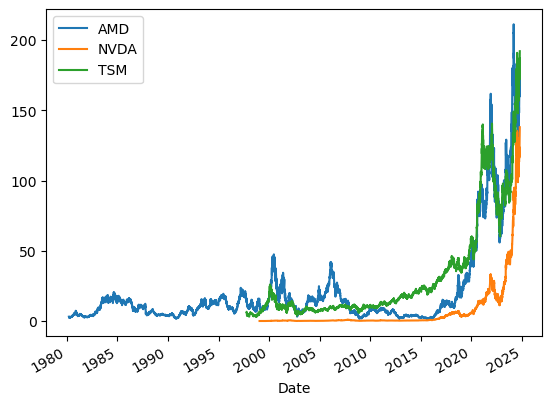

In [133]:
data.Close_AMD.plot()
data.Close_NVDA.plot()
data.Close_TSM.plot()
plt.legend(['AMD', 'NVDA', 'TSM'])

In [134]:
data.head()
data.tail()

,Adj Close_AMD,Adj Close_NVDA,Adj Close_TSM,Close_AMD,Close_NVDA,Close_TSM,High_AMD,High_NVDA,High_TSM,Low_AMD,Low_NVDA,Low_TSM,Open_AMD,Open_NVDA,Open_TSM,Volume_AMD,Volume_NVDA,Volume_TSM
Date,,,,,,,,,,,,,,,,,,
1980-03-17,3.15,NaN,NaN,3.15,NaN,NaN,3.30,NaN,NaN,3.12,NaN,NaN,0.00,NaN,NaN,219600,NaN,NaN
1980-03-18,3.03,NaN,NaN,3.03,NaN,NaN,3.12,NaN,NaN,2.94,NaN,NaN,0.00,NaN,NaN,727200,NaN,NaN
1980-03-19,3.04,NaN,NaN,3.04,NaN,NaN,3.08,NaN,NaN,3.02,NaN,NaN,0.00,NaN,NaN,295200,NaN,NaN
1980-03-20,3.01,NaN,NaN,3.01,NaN,NaN,3.06,NaN,NaN,3.01,NaN,NaN,0.00,NaN,NaN,159600,NaN,NaN
1980-03-21,2.92,NaN,NaN,2.92,NaN,NaN,3.02,NaN,NaN,2.91,NaN,NaN,0.00,NaN,NaN,130800,NaN,NaN


,Adj Close_AMD,Adj Close_NVDA,Adj Close_TSM,Close_AMD,Close_NVDA,Close_TSM,High_AMD,High_NVDA,High_TSM,Low_AMD,Low_NVDA,Low_TSM,Open_AMD,Open_NVDA,Open_TSM,Volume_AMD,Volume_NVDA,Volume_TSM
Date,,,,,,,,,,,,,,,,,,
2024-10-08,172.80,132.89,186.05,172.80,132.89,186.05,173.60,133.48,186.54,170.00,129.42,182.03,171.75,130.26,184.96,34730200,285722500.00,10394200.00
2024-10-09,171.02,132.65,187.14,171.02,132.65,187.14,174.05,134.52,188.00,169.55,131.38,182.26,174.05,134.11,187.80,33890700,246191600.00,11925000.00
2024-10-10,164.18,134.81,185.78,164.18,134.81,185.78,172.01,135.00,187.08,162.00,131.00,184.40,169.76,131.91,185.86,75113600,242311300.00,6443800.00
2024-10-11,167.89,134.80,190.81,167.89,134.80,190.81,169.35,135.78,191.49,163.01,133.66,188.01,164.19,134.01,188.17,42136200,170209500.00,12163900.00
2024-10-14,165.27,138.07,192.21,165.27,138.07,192.21,168.90,139.60,194.25,165.15,136.30,190.50,167.77,136.47,190.61,31757200,232347700.00,11714400.00


Use the dataframe <i>data</i> to answer the following questions. You are welcome to use series methods on a column of the dataframe.

## 1. <a id='toc1_'></a>[Question 1: NVDA](#toc0_)

### 1.1. <a id='toc1_1_'></a>[ When is the first date that NVDA closes at more than 135 dollars? (pick the closest date in Camino)](#toc0_)

In [74]:
# Step 1: Filter the data to only include rows where the NVDA is more than 135.
# Step 2: Get the index of the first row in the filtered data because the index is the date.
# Step 3: Get the first element of the index to get the first date.
firstDate = data[data.Close_NVDA > 135].index.min()
print("The first date that NVDA closes at more than 135 dollars is", firstDate)

The first date that NVDA closes at more than 135 dollars is 2024-06-18 00:00:00


### 1.2. <a id='toc1_2_'></a>[After the NVDA closing stock price hits 135 dollars, how many trading days did it take for NVDA reach the historical high? (pick the closest number of days in Camino)](#toc0_)

In [79]:
lastDate = data[data.Close_NVDA == data.Close_NVDA.max()].index.min()
daysItTook = data.loc[firstDate:last_date].shape[0]
print("It took", daysItTook, "trading days for NVDA to reach the historical high.")

It took 82 trading days for NVDA to reach the historical high.


### 1.3. <a id='toc1_3_'></a>[Report the correlation matrix between NVDA, TSM, and AMD's closing prices. Which pair of stocks are most correlated with each other? (answer MC question on Camino)](#toc0_) 

In [94]:
correlationMatrix = data[['Close_NVDA', 'Close_TSM', 'Close_AMD']].corr()
# This is used to convert the correlation matrix into a series because it is easier for sorting
correlatedPairs = correlationMatrix.unstack()
# Removing any diagonals because the correlation of a stock with itself is 1.
correlatedPairs = correlatedPairs[correlatedPairs < 1]
# Find the pair of stocks with the highest correlation.
mostCorrelatedPair = correlatedPairs.idxmax()
# Find the highest correlation value between the pair of stocks.
higestCorrelatedPair = correlatedPairs.max()
correlationMatrix
mostCorrelatedPair, higestCorrelatedPair

,Close_NVDA,Close_TSM,Close_AMD
Close_NVDA,1.00,0.83,0.85
Close_TSM,0.83,1.00,0.92
Close_AMD,0.85,0.92,1.00


(('Close_TSM', 'Close_AMD'), 0.924682353440895)

### 1.4. <a id='toc1_4_'></a>[Suppose I apply the following transformation to adjust the original wide dataset. What structure of the dataset is now? What does each row of data represent? (answer MC question on Camino)](#toc0_)

In [95]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df
df_melt = pd.melt(data.reset_index(), 
                  id_vars=['Date'], 
                  value_vars=[
                      'Adj Close_AMD', 'Adj Close_NVDA', 'Adj Close_TSM',
                      'Close_AMD', 'Close_NVDA', 'Close_TSM',
                      'High_AMD', 'High_NVDA', 'High_TSM',
                      'Low_AMD', 'Low_NVDA', 'Low_TSM',
                      'Open_AMD', 'Open_NVDA', 'Open_TSM',
                      'Volume_AMD', 'Volume_NVDA', 'Volume_TSM'],
                  var_name='Variable', 
                  value_name='Value')

df_melt.head()
# Splitting the 'Variable' column to separate the ticker from the price type
df_melt[['Metric', 'Ticker']] = df_melt['Variable'].str.split('_', expand=True)

# Pivot the DataFrame to final format
df_final = df_melt.pivot_table(index=['Date', 'Ticker'], 
                               columns='Metric', 
                               values='Value').reset_index()
df_final.head()

,Date,Variable,Value
0,1980-03-17,Adj Close_AMD,3.15
1,1980-03-18,Adj Close_AMD,3.03
2,1980-03-19,Adj Close_AMD,3.04
3,1980-03-20,Adj Close_AMD,3.01
4,1980-03-21,Adj Close_AMD,2.92


Metric,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,AMD,3.15,3.15,3.30,3.12,0.00,219600.00
1,1980-03-18,AMD,3.03,3.03,3.12,2.94,0.00,727200.00
2,1980-03-19,AMD,3.04,3.04,3.08,3.02,0.00,295200.00
3,1980-03-20,AMD,3.01,3.01,3.06,3.01,0.00,159600.00
4,1980-03-21,AMD,2.92,2.92,3.02,2.91,0.00,130800.00


## 2. <a id='toc2_'></a>[Question 2: TSM](#toc0_)
For the rest of the assignment, continue to use ```data``` as defined earlier.

### 2.1. <a id='toc2_1_'></a>[Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % gain. (pick the date closest to the day with the largest gain ratio in Camino)](#toc0_)

In [173]:
# The percentage gain is calculated by taking the difference between the closing cost of the current day and the closing cost of the previous day, and then dividing that difference by the closing cost of the previous day.
# # pct_change() is a aggregate function to find the percentage change between the current and previous element
oneDayPercentChange = data['Close_TSM'].pct_change() * 100
topFiveLargest = oneDayPercentChange.nlargest(5)
topFiveLargest
type(topFiveLargest) # Checking output is a series

Date
2000-10-19   22.74
1997-10-28   22.63
2008-10-28   21.07
2002-10-15   19.47
2000-02-03   18.45
Name: Close_TSM, dtype: float64

pandas.core.series.Series

## 3. <a id='toc3_'></a>[Question 3: AMD](#toc0_)

### 3.1. <a id='toc3_1_'></a>[ Consider the following investment strategy for AMD: buy at the end of day 1, sell on the end of day 3.  Based on this strategy, what is the highest dollar amount you would lose in one trade?  Also report the buying and selling date for that particular trade. (pick the closest dollar amount it dropped in Camino)](#toc0_)

In [136]:
# shift(-2) is used to get the closing cost of day 3
loss_in_one_trade = (data['Close_AMD'].shift(-2)) - data.Close_AMD
highestLoss= loss_in_one_trade.min()
# first occurrence of the minimum value
buyingDate = loss_in_one_trade.idxmin() 
sellingDate = data['Close_AMD'].shift(-2).idxmin()
highestLoss
buyingDate
sellingDate

-21.779998779296875

Timestamp('2024-07-16 00:00:00')

Timestamp('2015-07-23 00:00:00')

## 4. <a id='toc4_'></a>[Question 4: Stock Movements in NVDA](#toc0_)

### 4.1. <a id='toc4_1_'></a>[In which days did we observe that the price increased more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 preceding trading session (today compared with previous 9 trading days).](#toc0_)

*Hint:* use a **rolling** minimum. Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [168]:
percentChange = data['Close_NVDA'].pct_change()
percentChangeInNineDays = data['Close_NVDA'].pct_change(9)
finalResult = percentChangeInNineDays[percentChangeInNineDays > 0.6]
finalResult

Date
2000-02-18   0.77
2000-02-22   0.64
2000-02-23   0.61
2000-03-09   0.64
2000-03-10   0.94
2000-03-13   1.33
2000-03-14   0.77
2000-03-15   0.82
2000-03-17   0.71
2001-10-12   0.61
2001-10-15   0.69
Name: Close_NVDA, dtype: float64

## 5. <a id='toc5_'></a>[Question 5: NVDA](#toc0_)

### 5.1. <a id='toc5_1_'></a>[What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data.](#toc0_)

*Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.

(Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [174]:
cumulativeMax = data['Close_NVDA'].cummax()
# Percentage loss
percentageLoss = (data['Close_NVDA'] - cumulativeMax) / (cumulativeMax * 100)  
highestLoss = percentageLoss.min()  
sellingDate = percentageLoss.idxmin()  
buyingDate = cumulativeMax[:sellingDate].idxmax() 
highestLoss
buyingDate
sellingDate

-0.00897224320424378

Timestamp('2002-01-03 00:00:00')

Timestamp('2002-10-09 00:00:00')